In [1]:
#features - características (1 sim, 0 não)
# pelo longo?
# perna curta?
# late?

porco1 = [0, 1, 0]
porco2 = [0, 1, 1]
porco3 = [1, 1, 0]

cachorro1 = [0, 1, 1]
cachorro2 = [1, 0, 1]
cachorro3 = [1, 1, 1]

x_train = [porco1, porco2, porco3, cachorro1, cachorro2, cachorro3]
y_train = [1, 1, 1, 0, 0, 0] # labels


In [2]:
from sklearn.svm import LinearSVC
model = LinearSVC()
model.fit(x_train, y_train)

LinearSVC()

In [3]:
animal_misterioso = [1, 1 , 1]
model.predict([animal_misterioso])

array([0])

In [4]:
m1 = [1, 1, 1]
m2 = [1, 1, 0]
m3 = [0, 1, 1]
x_test = [m1, m2, m3]
y_test = [0, 1, 1]
previsoes = model.predict(x_test)

corretos = (previsoes == y_test).sum()
total = len(x_test)
print('Taxa de acerto: {}%'.format((corretos/ total).round(2)*100))

Taxa de acerto: 67.0%


In [5]:
from sklearn.metrics import accuracy_score

taxa_acerto = accuracy_score(y_test, previsoes)
print(taxa_acerto)

0.6666666666666666


In [6]:
import pandas as pd 

uri='https://gist.githubusercontent.com/guilhermesilveira/2d2efa37d66b6c84a722ea627a897ced/raw/10968b997d885cbded1c92938c7a9912ba41c615/tracking.csv'

dados = pd.read_csv(uri)
dados.head()

,home,how_it_works,contact,bought
0,1,1,0,0
1,1,1,0,0
2,1,1,0,0
3,1,1,0,0
4,1,1,0,0


In [7]:
mapa = {
    'home': 'principal',
    'how_it_works': 'como funciona',
    'contact': 'contato',
    'bought': 'comprou'
}
dados = dados.rename(columns=mapa)
dados.head()

,principal,como funciona,contato,comprou
0,1,1,0,0
1,1,1,0,0
2,1,1,0,0
3,1,1,0,0
4,1,1,0,0


In [8]:
x = dados[['principal', 'como funciona', 'contato']]
x.head()

,principal,como funciona,contato
0,1,1,0
1,1,1,0
2,1,1,0
3,1,1,0
4,1,1,0


In [9]:
y = dados['comprou']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: comprou, dtype: int64

In [10]:
dados.shape

(99, 4)

In [11]:
#separando dados de treino e teste
x_treino = x[:75]
y_treino = y[:75]
x_teste = x[75:]
y_teste = y[75:]

In [12]:
#treinando o modelo
modelo = LinearSVC()
modelo.fit(x_treino, y_treino)
previsoes = modelo.predict(x_teste)
taxa_de_acerto = accuracy_score(y_teste, previsoes)

print('Taxa de acerto: {}%'.format((taxa_de_acerto).round(2)*100))


Taxa de acerto: 96.0%


In [13]:
# utilizando a biblioteca para separar dados de treino e teste
# o argumento stratify é para manter a proporção entre treino e testes
from sklearn.model_selection import train_test_split
seed = 20
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y, random_state = seed, test_size = 0.25, stratify=y)
#treinando o modelo
modelo = LinearSVC()
modelo.fit(x_treino, y_treino)
previsoes = modelo.predict(x_teste)
taxa_de_acerto = accuracy_score(y_teste, previsoes)

print('Taxa de acerto: {}%'.format((taxa_de_acerto).round(2)*100))

Taxa de acerto: 96.0%


In [14]:
y_teste.value_counts()

0    17
1     8
Name: comprou, dtype: int64

In [15]:
import pandas as pd 
uri= 'https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv'
dados = pd.read_csv(uri)

In [16]:
dados.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [17]:
mapa = {
    'unfinished': 'nao_finalizado',
    'expected_hours': 'horas_esperadas',
    'price': 'preco'
}
dados = dados.rename(columns=mapa)
dados.head()

,nao_finalizado,horas_esperadas,preco
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [18]:
# criando uma coluna com finalizados (swap da nao finalizados)
troca = {
    0: 1,
    1: 0
}

dados['finalizado'] = dados['nao_finalizado'].map(troca)
dados.head()


,nao_finalizado,horas_esperadas,preco,finalizado
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0


In [19]:
dados.tail()

,nao_finalizado,horas_esperadas,preco,finalizado
2152,0,80,7518,1
2153,1,52,1332,0
2154,0,40,473,1
2155,0,75,5324,1
2156,1,37,377,0


<AxesSubplot:xlabel='horas_esperadas', ylabel='preco'>

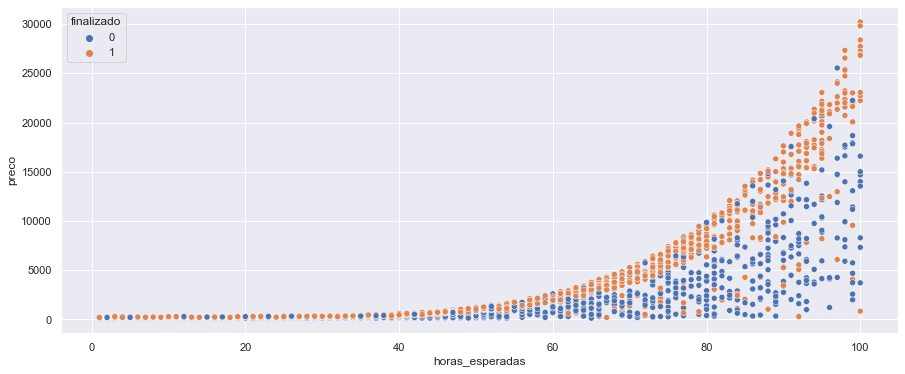

In [20]:
import seaborn as sns

sns.set(rc={'figure.figsize':(15, 6)})
sns.scatterplot(x = 'horas_esperadas', y = 'preco', data = dados, hue = "finalizado") # a cor está distinguindo projetos finalizados/naofinalizados

In [21]:
x = dados[['horas_esperadas', 'preco']]
y = dados['finalizado']
# utilizando a biblioteca para separar dados de treino e teste
# o argumento stratify é para manter a proporção entre treino e testes

seed = 5
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y, random_state = seed, test_size = 0.25, stratify=y)
#treinando o modelo
modelo = LinearSVC()
modelo.fit(x_treino, y_treino)
previsoes = modelo.predict(x_teste)
taxa_de_acerto = accuracy_score(y_teste, previsoes)

print('Taxa de acerto: {}%'.format((taxa_de_acerto).round(2)*100))

Taxa de acerto: 53.0%


C:\Users\joaop\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [22]:
#criando uma linha de base para acurácia
import numpy as np

previsoes_de_base = np.ones(540)
taxa_de_acerto = accuracy_score(y_teste, previsoes_de_base)

print('Taxa de acerto da previsão de base: {}%'.format((taxa_de_acerto).round(2)*100))

Taxa de acerto da previsão de base: 53.0%


<AxesSubplot:xlabel='horas_esperadas', ylabel='preco'>

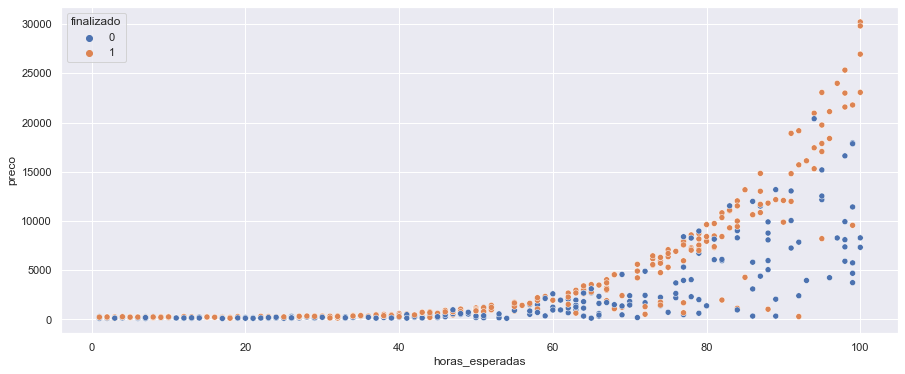

In [23]:
sns.set(rc={'figure.figsize':(15, 6)})
sns.scatterplot(x = 'horas_esperadas', y = 'preco', data = x_teste, hue = y_teste) # a cor está distinguindo projetos finalizados/naofinalizados

In [24]:
x_min = x_teste['horas_esperadas'].min()
x_max = x_teste['horas_esperadas'].max()
y_min = x_teste['preco'].min()
y_max = x_teste['preco'].max()
print(x_min, x_max, y_min, y_max)

1 100 100 30223


In [25]:
pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)
xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]
pontos

array([[1.000000e+00, 1.000000e+02],
       [1.990000e+00, 1.000000e+02],
       [2.980000e+00, 1.000000e+02],
       ...,
       [9.703000e+01, 2.992177e+04],
       [9.802000e+01, 2.992177e+04],
       [9.901000e+01, 2.992177e+04]])

In [26]:
z = modelo.predict(pontos)
z = z.reshape(xx.shape)
z

C:\Users\joaop\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=int64)

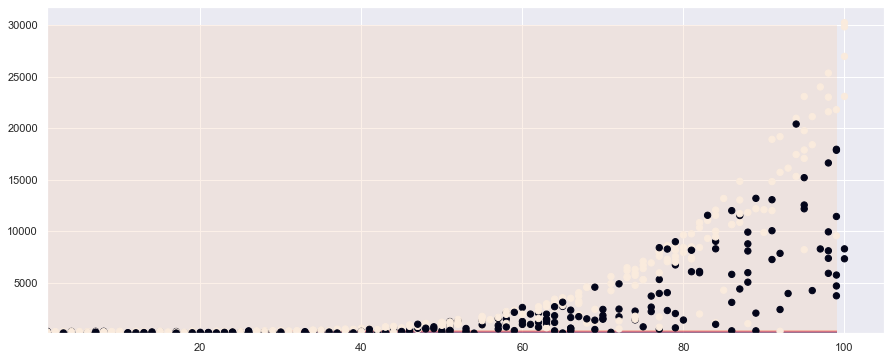

In [38]:
import matplotlib.pyplot as plt
plt.contourf(xx, yy, z, alpha = 0.3)
plt.scatter(x_teste['horas_esperadas'], x_teste['preco'], c = y_teste, s = 40)

In [41]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = SVC(gamma='auto')
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)
acerto = accuracy_score(teste_y, previsoes) * 100
print('Acerto: {:.2f}%'.format(acerto))

Treinaremos com 1617 elementos e testaremos com 540 elementos
Acerto: 66.85%


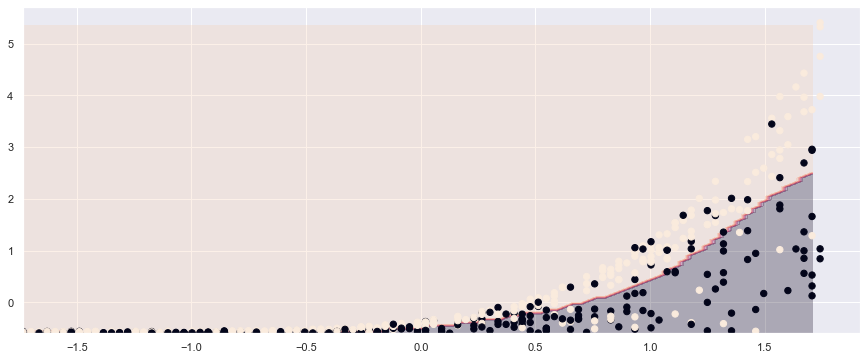

In [42]:
data_x = teste_x[:, 0]
data_y = teste_x[:, 1]

x_min = data_x.min()
x_max = data_x.max()
y_min = data_y.min()
y_max = data_y.max()


pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)
xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

z = modelo.predict(pontos)
z = z.reshape(xx.shape)



plt.contourf(xx, yy, z, alpha = 0.3)
plt.scatter(data_x, data_y, c = y_teste, s = 40)
